<a href="https://colab.research.google.com/github/sauraviitj/Machine_learning_with_Python_Zero_to_Hero/blob/main/Linear_Regression_and_Logisitic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import numpy as np
import matplotlib.pyplot as plt


In [170]:
X= np.array([20,25,30,35,40], dtype=np.float64)
Y=np.array([200,300,3500,500,1000],dtype=np.float64)

#Normalise X and Y
X_norm=((X-X.mean())/X.std())
Y_norm=((Y-Y.mean())/Y.std())
print(f"X after normalisation {X_norm}")
print(f"Y after normalisation {Y_norm}")

X after normalisation [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
Y after normalisation [-0.73095882 -0.64974117  1.94922351 -0.48730588 -0.08121765]


In [171]:
m=0.0
c=0.0

lr=0.001
epochs=100000
n=len(X)

In [172]:
for epochs in range(epochs):
  Y_pred=m*X_norm+c
  D_m=(-2/n) * np.sum((Y_norm-Y_pred)*X_norm)
  D_c=(-2/n) * np.sum(Y_norm-Y_pred)

  m=m-lr*D_m
  c=c-lr*D_c
  #print(D_c)
  if epochs % 10000==0:
    loss= np.mean((Y_norm-Y_pred)**2)
    print(f"Loss is {loss}")

Loss is 1.0
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618


In [173]:
#Denormalise
Y_pred_norm= Y_pred
Y_pred=Y_pred_norm*Y.std()+Y.mean()
print(Y_pred)
X=X_norm*X.std()+X.mean()
print(X)
Y=Y_norm*Y.std()+Y.mean()
print(Y)

[ 740.  920. 1100. 1280. 1460.]
[20. 25. 30. 35. 40.]
[ 200.  300. 3500.  500. 1000.]


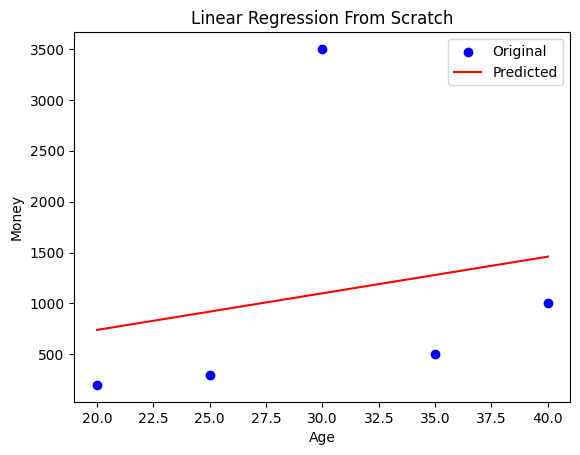

In [174]:
plt.scatter(X,Y, color='blue', label="Original")
plt.plot(X,Y_pred, color='red', label='Predicted')
plt.xlabel("Age")
plt.ylabel("Money")
plt.legend()
plt.title("Linear Regression From Scratch")
plt.show()

In [175]:
age= 28
age_norm=(age-X.mean())/X.std()
#print(age_norm)
Y_pred_norm= m*age_norm+c
Y_pred=Y_pred_norm*Y.std()+Y.mean()
print(Y_pred)

1028.0000000000025


In [269]:
import numpy as np

# Independent variables
X = np.array([
    [10, 7, 70],
    [15, 8, 80],
    [8, 6, 60],
    [20, 9, 90],
    [12, 7, 75],
    [18, 8, 85],
    [5, 5, 50],
    [22, 9, 95],
    [17, 8, 88],
    [9, 6, 65]
])

# Target variable
y = np.array([75, 82, 68, 90, 78, 88, 60, 92, 86, 70])  # shape: (10,)

import numpy as np

# Independent variables: [Preparation, Skill, Health]
X_test = np.array([
    [14, 7, 78],
    [6, 5, 55],
    [19, 9, 92],
    [11, 7, 70],
    [16, 8, 83],
    [7, 6, 60],
    [13, 7, 74],
    [21, 9, 96],
    [10, 6, 68],
    [17, 8, 85]
])

# Target variable: performance/percentage
y_test = np.array([80, 62, 91, 74, 85, 66, 77, 93, 72, 88])



In [270]:
print(f"Shape of X= {X.shape}")
print(f"Shape of y= {y.shape}")


Shape of X= (10, 3)
Shape of y= (10,)


In [271]:

np.ones(X.shape[0],)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [272]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T

In [273]:
print(X)
print(f"Shape of X= {X.shape}")
print(f"Shape of y= {y.shape}")

[[ 1. 10.  7. 70.]
 [ 1. 15.  8. 80.]
 [ 1.  8.  6. 60.]
 [ 1. 20.  9. 90.]
 [ 1. 12.  7. 75.]
 [ 1. 18.  8. 85.]
 [ 1.  5.  5. 50.]
 [ 1. 22.  9. 95.]
 [ 1. 17.  8. 88.]
 [ 1.  9.  6. 65.]]
Shape of X= (10, 4)
Shape of y= (10,)


In [255]:
X[9:,1:]

array([[ 9.,  6., 65.]])

In [274]:
X_test=np.vstack((np.ones(X_test.shape[0]), X_test.T)).T
print(X_test)

[[ 1. 14.  7. 78.]
 [ 1.  6.  5. 55.]
 [ 1. 19.  9. 92.]
 [ 1. 11.  7. 70.]
 [ 1. 16.  8. 83.]
 [ 1.  7.  6. 60.]
 [ 1. 13.  7. 74.]
 [ 1. 21.  9. 96.]
 [ 1. 10.  6. 68.]
 [ 1. 17.  8. 85.]]


In [275]:
# Initialize a column vector of zeros with length equal to the number of features:
m = np.zeros((X.shape[1], 1))  # Shape: (num_features or number of parameters, 1 as in column)

# Explanation:
# np.zeros(...) creates an array filled with zeros.
# (X.shape[1], 1) is a tuple specifying a 2D shape:
#   - rows = number of features (X.shape[1])
#   - columns = 1, making it a column vector
# This kind of array is often used to store parameters like coefficients (theta) in linear regression.
print(m)

[[0.]
 [0.]
 [0.]
 [0.]]


In [276]:
def model(X, y, lr, epochs):
  """
  A simple linear regression model.

  Args:
    X: The input features, with a bias term.
    y: The target values.
    lr: The learning rate.
    epochs: The number of training epochs.

  Returns:
    A tuple containing the trained model parameters (m) and a list of losses
    over the training epochs.
  """
  n = y.size
  m = np.zeros((X.shape[1], 1))
  loss_list = []
  y = y.reshape(-1, 1)

  for i in range(epochs):
    # Calculate predictions
    y_pred = np.dot(X, m)

    # Calculate loss (Mean Squared Error)
    loss = np.sum((y_pred - y)**2) / (2 * n)

    # Calculate the gradient (derivative of the loss with respect to m)
    D_m = np.dot(X.T, (y_pred - y)) / n

    # Update the model parameters
    m = m - lr * D_m

    loss_list.append(loss)

    if i % 10 == 0:
      print(f"Loss after {i} epochs: {loss}")

  return m, loss_list

Loss after 0 epochs: 3163.05
Loss after 10 epochs: 2794.72112217215
Loss after 20 epochs: 2469.442862578134
Loss after 30 epochs: 2182.183403781296
Loss after 40 epochs: 1928.4990543210674
Loss after 50 epochs: 1704.465507712699
Loss after 60 epochs: 1506.61713599284
Loss after 70 epochs: 1331.8933787218252
Loss after 80 epochs: 1177.5913981155886
Loss after 90 epochs: 1041.3242679130785
Loss after 100 epochs: 920.9840491882945
Loss after 110 epochs: 814.709181913909
Loss after 120 epochs: 720.8556878452965
Loss after 130 epochs: 637.9717392524209
Loss after 140 epochs: 564.7752000944934
Loss after 150 epochs: 500.13379221407314
Loss after 160 epochs: 443.0475797345971
Loss after 170 epochs: 392.6335007064288
Loss after 180 epochs: 348.1117067161135
Loss after 190 epochs: 308.79349914152306
Loss after 200 epochs: 274.0706754346489
Loss after 210 epochs: 243.40612062601508
Loss after 220 epochs: 216.32549850742743
Loss after 230 epochs: 192.40991396109774
Loss after 240 epochs: 171.2894

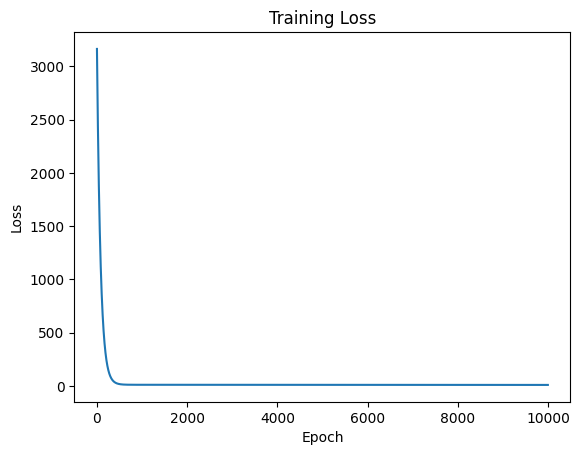

In [279]:
epochs = 10000
lr = 1e-6
m, loss_list = model(X, y, lr=lr, epochs=epochs)

# Plot the loss over epochs
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

In [280]:

y_pred =np.dot(X_test,m)
y_pred=y_pred.flatten()
Test_error=(1/X_test.shape[0])*np.sum((y_pred-y_test)**2)
print(y_pred-y_test)
print(f"TEst error is :{Test_error}")
print(y_pred.shape) #This is a 2-dimensional array (2D array or matrix) with 10 rows and 1 column
print(y_test.shape) #This is a 1-dimensional array (1D array or vector) with 10 elements.

print(y_pred.shape) #This is a 1-dimensional array (1D array or vector) with 10 elements.
Test_loss=np.sqrt((y_pred-y_test)**2)


[ 0.30065466 -5.61824332  3.94812186 -1.96241758  0.57497053 -4.40932878
 -0.7981808   6.11235865 -2.14625653 -0.34291107]
TEst error is :11.358859758581687
(10,)
(10,)
(10,)


[0.30065466 5.61824332 3.94812186 1.96241758 0.57497053 4.40932878
 0.7981808  6.11235865 2.14625653 0.34291107]


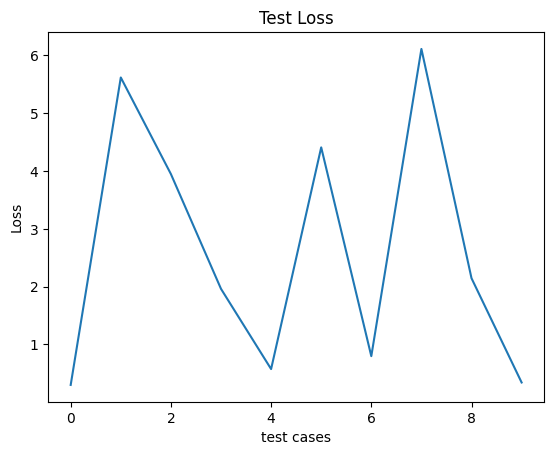

In [281]:

#print(y_pred-y_test)

print(Test_loss)
plt.plot(Test_loss)
plt.xlabel("test cases")
plt.ylabel("Loss")
plt.title("Test Loss")
plt.show()
